In [1]:
fn = 'site/bytes'
with open(fn) as f:
    data = [*map(int, f.read().split())]

In [2]:
PNG = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'
len(PNG)

16

In [3]:
for i, x in enumerate(PNG):
    print(f'{x:02x}', [(q, chr(q+48)) for q, k in ((q, data[q*16+i]) for q in range(len(data) // 16)) if k == x])

89 [(8, '8'), (14, '>')]
50 [(8, '8')]
4e [(2, '2')]
47 [(9, '9')]
0d [(2, '2')]
0a [(4, '4')]
1a [(2, '2'), (6, '6')]
0a [(4, '4')]
00 [(7, '7')]
00 [(3, '3'), (4, '4')]
00 [(3, '3'), (4, '4')]
0d [(4, '4'), (6, '6')]
49 [(0, '0')]
48 [(4, '4')]
44 [(8, '8')]
52 [(6, '6')]


In [4]:
import io
from PIL import Image
def decode_flag(flag):
    xs = bytes(data[((j + ord(flag[i*2]) - 48) * 16) % len(data) + i] for j in range(len(data) // 16) for i in range(16))
    s = io.BytesIO(xs)
    return Image.open(s)

In [5]:
import itertools
def options(i):
    for q, k in ((q, data[q*16+i]) for q in range(len(data) // 16)):
        if k == PNG[i]:
            yield q
            
for p in itertools.product(*(options(i) for i in range(len(PNG)))):
    xs = bytes(data[((j + p[i]) * 16) % len(data) + i] for j in range(len(data) // 16) for i in range(16))
    s = io.BytesIO(xs)
    try:
        flag = ''.join(map(str, (q for ab in zip(p, [0]*len(p)) for q in ab)))
        im = decode_flag(flag)
        print(flag)
        print(im)
    except OSError:
        pass

80802090204020407030306000408060
<PIL.PngImagePlugin.PngImageFile image mode=1 size=370x370 at 0x10E0D3690>


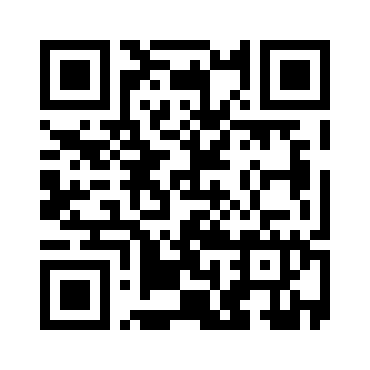

In [6]:
decode_flag('80802090204020407030306000408060')